In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_dfs(dict):
    dfs=[]
    for method, chkpt in dict.items():
        df=pd.read_csv(chkpt,'\t')
        df['method']=method
        dfs.append(df)
    dfs=pd.concat(dfs)
    dfs.columns=[i.strip() for i in df.columns]
    return dfs

/var/folders/z5/cs_w84312s1cxj7105940jzm0000gn/T/ipykernel_37307/994804169.py:4: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df=pd.read_csv(chkpt,'\t')
/var/folders/z5/cs_w84312s1cxj7105940jzm0000gn/T/ipykernel_37307/994804169.py:4: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df=pd.read_csv(chkpt,'\t')
/var/folders/z5/cs_w84312s1cxj7105940jzm0000gn/T/ipykernel_37307/994804169.py:4: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df=pd.read_csv(chkpt,'\t')
/var/folders/z5/cs_w84312s1cxj7105940jzm0000gn/T/ipykernel_37307/994804169.py:4: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df=pd.read_csv(chkpt,'\t')
/var/fol

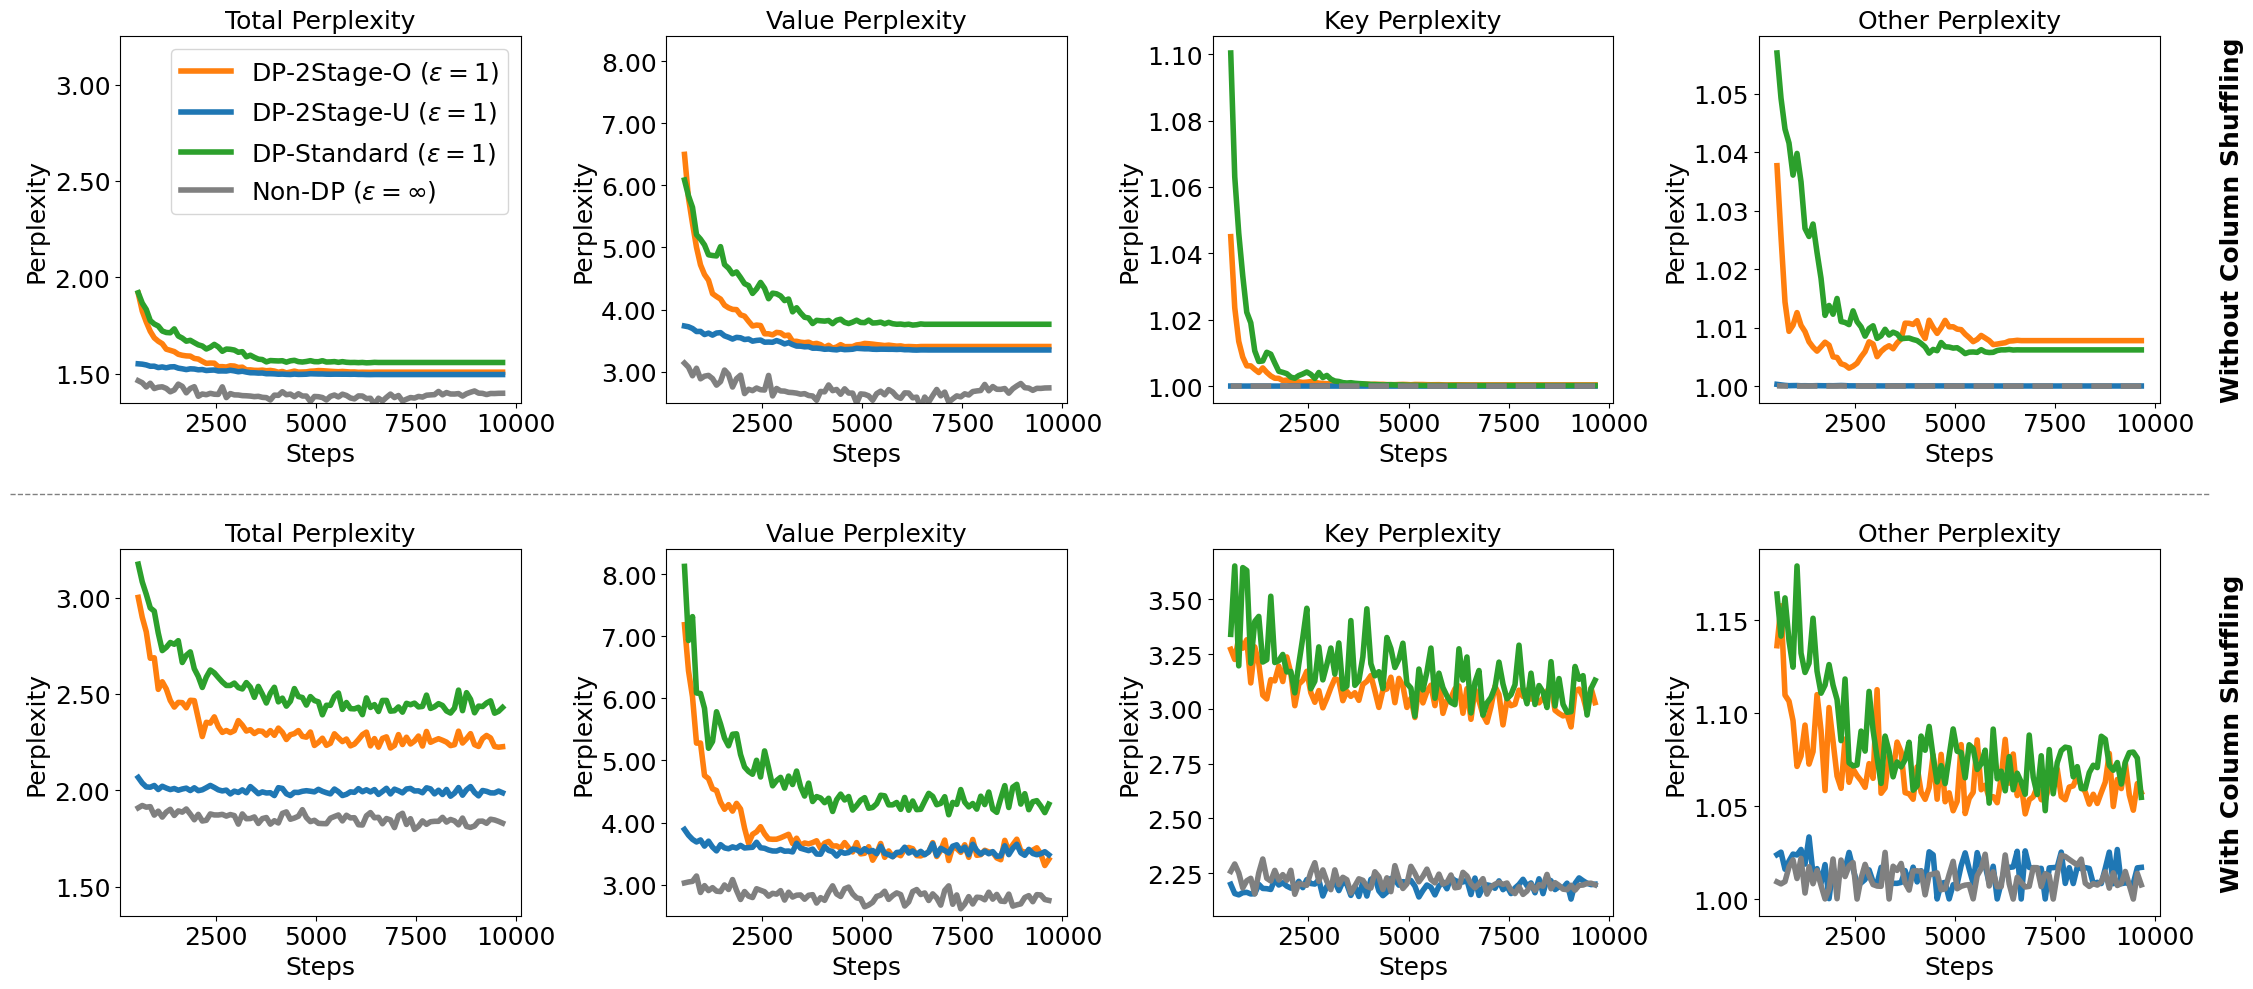

In [3]:

import numpy as np
import matplotlib.ticker as mtick

col='method'
fig, ax = plt.subplots(2,4, figsize=(22, 10))
fontsize=18
x = list(np.arange(9660-1, 500, -100))

dict={
    r"DP-Standard ($\varepsilon=1$)": "./results/figure3/adult_perp_step_eps1_std_noshfl.txt",
    r"DP-2Stage-O ($\varepsilon=1$)": "./results/figure3/adult_perp_step_eps1_ood-airline_noshfl.txt",
    r"DP-2Stage-U ($\varepsilon=1$)": "./results/figure3/adult_perp_step_eps1_uniform_noshfl.txt",
    r"Non-DP ($\varepsilon=\infty$)": "./results/figure3/adult_perp_step_eps1_nodp_noshfl.txt"
}

dfs=get_dfs(dict)

dict2={
    r"DP-Standard ($\varepsilon=1$)": "./results/figure3/adult_perp_step_eps1_std_shfl.txt",
    r"DP-2Stage-O ($\varepsilon=1$)": "./results/figure3/adult_perp_step_eps1_ood-airline_shfl.txt",
    r"DP-2Stage-U ($\varepsilon=1$)": "./results/figure3/adult_perp_step_eps1_uniform_shfl.txt",
    r"Non-DP ($\varepsilon=\infty$)": "./results/figure3/adult_perp_step_eps1_nodp_shfl.txt",
    
}


dfs2=get_dfs(dict2)

color=["C1", "C0", "C2", "gray"]
g=dfs[['Perp',  col]].pivot(columns=col, values='Perp').iloc[x].plot(kind='line', linewidth=4, ax=ax[0,0], color=color)
g=dfs[['Val Perp',  col]].pivot(columns=col, values='Val Perp').iloc[x].plot(kind='line', linewidth=4, ax=ax[0,1], color=color)


g=dfs[['Key Perp',  col]].pivot(columns=col, values='Key Perp').iloc[x].plot(kind='line', linewidth=4, ax=ax[0,2], color=color)
for line, ls in zip(g.get_lines(), ["-","-","-","--"]):
    line.set_linestyle(ls)
    

g=dfs[['Other Perp',  col]].pivot(columns=col, values='Other Perp').iloc[x].plot(kind='line', linewidth=4, ax=ax[0,3], color=color)
for line, ls in zip(g.get_lines(), ["-","-","-","--"]):
    line.set_linestyle(ls)




color=["C1", "C0", "C2", "gray"]
dfs2[['Perp',  col]].pivot(columns=col, values='Perp').iloc[x].plot(kind='line', linewidth=4, ax=ax[1,0], color=color,)
dfs2[['Val Perp',  col]].pivot(columns=col, values='Val Perp').iloc[x].plot(kind='line', linewidth=4, ax=ax[1,1], color=color)
dfs2[['Key Perp',  col]].pivot(columns=col, values='Key Perp').iloc[x].plot(kind='line', linewidth=4, ax=ax[1,2], color=color)
dfs2[['Other Perp',  col]].pivot(columns=col, values='Other Perp').iloc[x].plot(kind='line', linewidth=4, ax=ax[1,3], color=color)



ax[0,1].legend([], frameon=False)
ax[0,2].legend([], frameon=False)
ax[0,3].legend([], frameon=False)

ax[1,1].legend([], frameon=False)
ax[1,2].legend([], frameon=False)
ax[1,3].legend([], frameon=False)
ax[1,0].legend([], frameon=False)
ax[0,0].legend(fontsize=fontsize)

for i in range(2):
    ax[i,0].set_title("Total Perplexity", fontsize=fontsize)
    ax[i,1].set_title("Value Perplexity", fontsize=fontsize)
    ax[i,2].set_title("Key Perplexity", fontsize=fontsize)
    ax[i,3].set_title("Other Perplexity", fontsize=fontsize)


ax[0,0].set_ylabel("Perplexity", fontsize=fontsize)
ax[1,0].set_ylabel("Perplexity", fontsize=fontsize)

for i in range(4):
    ax[0,i].set_ylabel("Perplexity", fontsize=fontsize)

for i in range(4):
    ax[1,i].set_ylabel("Perplexity", fontsize=fontsize)

for i in range(4):
    ax[1,i].set_xlabel("Steps", fontsize=fontsize)

    ax[1,i].tick_params(axis='x', labelsize=fontsize)

    ax[0,i].set_xlabel("Steps", fontsize=fontsize)

    ax[0,i].tick_params(axis='x', labelsize=fontsize)

    ax[1,i].tick_params(axis='y', labelsize=fontsize)


for i in range(4):
    ax[0,i].tick_params(axis='y', labelsize=fontsize)

for row in ax:
    for subplot in row:
        # Format y-axis to 2 decimal places for each subplot
        subplot.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
      




plt.subplots_adjust()
fig.tight_layout()
fig.subplots_adjust(hspace=0.4) 
# Draw a dashed line across the figure
line_y = 0.5  # y-coordinate in normalized figure coordinates
fig.add_artist(plt.Line2D([0, 1], [line_y, line_y], color='grey', linestyle='--', linewidth=1, transform=fig.transFigure))

ax[0,3].text(
    1.15, 0.5, 'Without Column Shuffling',  # Position: slightly outside the right edge at mid-height
    rotation=90,                  # Rotate text 90 degrees
    verticalalignment='center',   # Center the text vertically
    horizontalalignment='left',   # Align text to the left
    transform=ax[0,3].transAxes ,       # Use Axes coordinates
    fontsize=fontsize,
    weight='bold'
)

ax[0,1].set_ylim([2.5, 8.4])
ax[1,1].set_ylim([2.5, 8.4])

ax[0,0].set_ylim([1.35, 3.25])
ax[1,0].set_ylim([1.35, 3.25])


ax[1,3].text(
    1.15, 0.5, 'With Column Shuffling',  # Position: slightly outside the right edge at mid-height
    rotation=90,                  # Rotate text 90 degrees
    verticalalignment='center',   # Center the text vertically
    horizontalalignment='left',   # Align text to the left
    transform=ax[1,3].transAxes ,       # Use Axes coordinates
    fontsize=fontsize,
    weight='bold'
)

plt.savefig("figure3.pdf", dpi=250,bbox_inches='tight')


